In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
import tensorflow

file_list = []
class_list = []

DATADIR = "Data"

In [2]:
CATEGORIES = ["Animal", "Vehicle", "Credit_card"]

In [5]:
IMG_SIZE = 100

In [4]:
for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

In [6]:
training_data = []
import tensorflow as tf 
def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()

In [69]:
random.shuffle(training_data)

In [115]:
X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

Train on 573 samples, validate on 64 samples
Epoch 1/45
573/573 [==============================] - 39s 68ms/sample - loss: 1.4013 - acc: 0.3979 - val_loss: 1.8172 - val_acc: 0.0000e+00
Epoch 2/45
573/573 [==============================] - 35s 61ms/sample - loss: 0.9074 - acc: 0.5759 - val_loss: 0.7909 - val_acc: 0.6719
Epoch 3/45
573/573 [==============================] - 35s 61ms/sample - loss: 0.6826 - acc: 0.7138 - val_loss: 0.2390 - val_acc: 0.8906
Epoch 4/45
573/573 [==============================] - 35s 61ms/sample - loss: 0.5402 - acc: 0.7766 - val_loss: 0.3797 - val_acc: 0.8594
Epoch 5/45
573/573 [==============================] - 35s 61ms/sample - loss: 0.5074 - acc: 0.7784 - val_loss: 0.6422 - val_acc: 0.8125
Epoch 6/45
573/573 [==============================] - 35s 61ms/sample - loss: 0.4295 - acc: 0.8237 - val_loss: 0.5886 - val_acc: 0.8125
Epoch 7/45
573/573 [==============================] - 35s 61ms/sample - loss: 0.3282 - acc: 0.8639 - val_loss: 0.3174 - val_acc: 0.8750

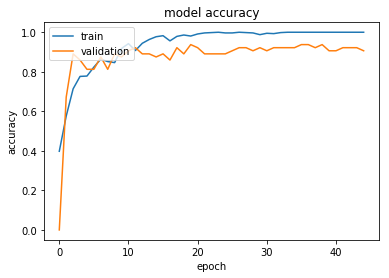

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 13 neurons, for 13 classes
model.add(Dense(13))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=45, validation_split=0.1)

# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN3.model')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [3]:
import tensorflow as tf 
def prepare(file):
    IMG_SIZE = 100
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
model = tf.keras.models.load_model("CNN3.model")
image = prepare("data/test/x1.png").astype(np.float32)
prediction = model.predict([image])
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])

Credit_card


In [4]:
pathF = "data/test/x1.png"

In [5]:
if CATEGORIES[prediction.index(max(prediction))] == "Credit_card":
    print("X")
    from imutils import contours
    import numpy as np
    import argparse
    import imutils
    import cv2
    import base64
    import os
    from cryptography.hazmat.backends import default_backend
    from cryptography.hazmat.primitives import hashes
    from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
    from cryptography.fernet import Fernet
    from PIL import Image
    import pytesseract

    def getInput():

        FIRST_NUMBER = {
            "1": "Unknown",
            "2": "Unknown",
            "3": "American Express",
            "4": "Visa",
            "5": "MasterCard",
            "6": "Discover Card",
            "7": "Unknown",
            "8": "Unknown",
            "9": "Unknown",
            "0": "Unknown",
        }
        computerVision(FIRST_NUMBER)


    def computerVision(FIRST_NUMBER):
        ref = cv2.imread("images/OCR_Images/ocr_a.png")
        ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
        ref = cv2.threshold(ref, 10, 255, cv2.THRESH_BINARY_INV)[1]

        refCnts = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL,
                                   cv2.CHAIN_APPROX_SIMPLE)
        refCnts = imutils.grab_contours(refCnts)
        refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]
        digits = {}

        # Przejście pętli przez kontury zdjęcia referencyjnego
        for (i, c) in enumerate(refCnts):
            # Wyszukiwanie liczb, wyodrębnianie ich i dopasowanie wielkości
            (x, y, w, h) = cv2.boundingRect(c)
            roi = ref[y:y + h, x:x + w]
            roi = cv2.resize(roi, (57, 88))

            # zaktualizowanie bazy cyfr, mapowanie nazw cyfr do ROI
            digits[i] = roi

        # inicjalizacja kernela
        rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
        sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

        # Wczytanie zdjęcia, dopasowanie wielkości i konwersja w skali szarości
        image = cv2.imread(pathF)
        height, width, channels = image.shape
        image = imutils.resize(image, width=300)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)

        # obliczanie gradientu Scharra i przeskalowanie
        # compute the Scharr gradient of the tophat image, then scale
        gradX = cv2.Sobel(tophat, ddepth=cv2.CV_32F, dx=1, dy=0,
                          ksize=-1)
        gradX = np.absolute(gradX)
        (minVal, maxVal) = (np.min(gradX), np.max(gradX))
        gradX = (255 * ((gradX - minVal) / (maxVal - minVal)))
        gradX = gradX.astype("uint8")

        # Zastosowanie operacji zamykania za pomocą Kernela w celu
        # zamknięcia luk pomiędzy cyframi w kartach kredytowych
        # binaryzacja obrazu metodą Otsu

        gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKernel)
        thresh = cv2.threshold(gradX, 0, 255,
                               cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

        # Zastosowanie drugiej operacji zamykania dla zdjęcia zbinaryzowanego
        # aby unikac luk między cyframi

        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)

        # znajdywanie konturów na obrazie progowym, nastepnie inicjalizowanie
        # listy lokalizacji cyfr

        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                                cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        locs = []

        # przechodzenie pętli po konturach
        for (i, c) in enumerate(cnts):
            # przejście pętli przez kontury nastepnie użycie ramki ograniczającej
            # i wyznaczenie współczynnika kształtu

            (x, y, w, h) = cv2.boundingRect(c)
            ar = w / float(h)

            # karty kredytowe używają czcionki o stałym rozmiarze i są w 4 grupach
            # przycinanie kontur na podstawie współczynnika kształtu
            if 2.5 < ar < 4.0:
                # kontury można przycinać przy różnej szerokości
                if (40 < w < 55) and (10 < h < 20):
                    # dołączenie regionu ramki granicznej zawierającej grupy cyfr
                    locs.append((x, y, w, h))

        # posortowanie lokalizacji cyfr od lewej do prawej a następnie inicjalizowanie
        # listy sklasyfikowanych cyfr

        locs = sorted(locs, key=lambda x: x[0])
        output = []

        # Pętla przechodząca przez 4 cyfry 4 grup
        for (i, (gX, gY, gW, gH)) in enumerate(locs):
            # inicjalizacja listy zgrupowanych cyfr
            groupOutput = []

            # wyodrębnienie grupy 4 cyfr ze zdjęcia w skali szarości
            # implementacja progu w celu oddzielenia cyfr od tła karty kredytowej

            group = gray[gY - 5:gY + gH + 5, gX - 5:gX + gW + 5]
            group = cv2.threshold(group, 0, 255,
                                  cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

            # rozpoznawanie każdej pojedycznej liczby z grupy
            # sortowanie kontur od lewej do prawej
            digitCnts = cv2.findContours(group.copy(), cv2.RETR_EXTERNAL,
                                         cv2.CHAIN_APPROX_SIMPLE)
            digitCnts = imutils.grab_contours(digitCnts)
            digitCnts = contours.sort_contours(digitCnts,
                                               method="left-to-right")[0]

            # pętla po konturach cyfr
            for c in digitCnts:
                # obliczanie konturów dla pojedynczych cyfr, wyodręnienie
                # i dopasowanie do cyfr zdjęcia referencyjnego
                (x, y, w, h) = cv2.boundingRect(c)
                roi = group[y:y + h, x:x + w]
                roi = cv2.resize(roi, (57, 88))

                # inicjalizacja wyników pasujących do szablonu
                scores = []

                # przejście pętli przez zdjęcie referencyjne
                for (digit, digitROI) in digits.items():
                    # zastosowanie dopasowania szablonu opertego na korelacji
                    # zaktualizowanie listy wyników
                    result = cv2.matchTemplate(roi, digitROI,
                                               cv2.TM_CCOEFF)
                    (_, score, _, _) = cv2.minMaxLoc(result)
                    scores.append(score)

                # klasyfikacja dla cyfr będzie odniesieniem
                # nazwa cyfry z najlepszym wynikiem dopasowania
                groupOutput.append(str(np.argmax(scores)))

                # wyrysowanie konturów rozróżniających grupy cyfr
                # wyświetlenie zczytanych wartości z karty
                # cv2.rectangle(image, (gX - 5, gY - 5),
                #               (gX + gW + 5, gY + gH + 5), (0, 0, 255), 2)
                # cv2.putText(image, "".join(groupOutput), (gX, gY - 15),
                #             cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 255), 2)
                cv2.rectangle(image, (gX, gY),
                              (gX + gW, gY + gH), (0, 0, 0), 15)

            output.extend(groupOutput)
        print("Credit Card #: {}".format("".join(output)))
        print("Credit Card Type: {}".format(FIRST_NUMBER[(output[0])]))
        readHosterName(output, image, FIRST_NUMBER, pathF)


    def readHosterName(output,image, FIRST_NUMBER, pathF):
        import pytesseract
        pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
        img = Image.open(pathF)
        text = pytesseract.image_to_string(img)
        if not text :
            hostName = "".encode()
        else:
            lastLine = [i for i in text.split('\n') if i != ''][-1]
            hostName = lastLine.encode()
        encryptCardNumber(output, image, hostName, FIRST_NUMBER, pathF)


    def encryptCardNumber(output, image, hostName, FIRST_NUMBER, pathF):
        password_provided = "".join(output)

        password = password_provided.encode()
        salt = b'salt_'
        kdf = PBKDF2HMAC(
            algorithm=hashes.SHA256(),
            length=32,
            salt=salt,
            iterations=100000,
            backend=default_backend()
        )
        key = base64.urlsafe_b64encode(kdf.derive(password))

        typeOfCreditCard = FIRST_NUMBER[output[0]].encode()

        message = "".join(output).encode()
        Fernet.generate_key()
        f = Fernet(key)
        encrypted = f.encrypt(message)
        writeDataToFile(encrypted, image, typeOfCreditCard, hostName, pathF)


    def writeDataToFile(encrypted, image, typeOfCreditCard, hostName, pathF):
        fileW = open('key.key', 'ab')
        fileR = open('key.key', 'r')
        path = pathF.encode()
        if pathF in fileR.read():
            pass
        else:
            fileW.write(
                b"\n" + b"Path: " + path +
                b"\n" + b"\t" + b"Credit card number: " + encrypted +
                b"\n" + b"\t" + b"Credit card type: " + typeOfCreditCard +
                b"\n" + b"\t" + b"Hoster's name: " + hostName)
            fileW.close()
        cv2.imshow("Image", image)
        cv2.waitKey(0)

    getInput()

X


ModuleNotFoundError: No module named 'pytesseract'